In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df1=pd.read_csv("Employee.csv")

In [3]:
df1.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df1.shape

(4653, 9)

In [5]:
df1.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [6]:
for i in df1:
    print( i ,"=" ,df1[i].unique())

Education = ['Bachelors' 'Masters' 'PHD']
JoiningYear = [2017 2013 2014 2016 2015 2012 2018]
City = ['Bangalore' 'Pune' 'New Delhi']
PaymentTier = [3 1 2]
Age = [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender = ['Male' 'Female']
EverBenched = ['No' 'Yes']
ExperienceInCurrentDomain = [0 3 2 5 1 4 7 6]
LeaveOrNot = [0 1]


In [7]:
#label encoding: few categorical values
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df1['Gender']= lab.fit_transform(df1['Gender'])
df1['Education']= lab.fit_transform(df1['Education'])
df1['EverBenched']=lab.fit_transform(df1['EverBenched'])


In [8]:
for col in df1:
    print(col,"=", df1[col].unique())

Education = [0 1 2]
JoiningYear = [2017 2013 2014 2016 2015 2012 2018]
City = ['Bangalore' 'Pune' 'New Delhi']
PaymentTier = [3 1 2]
Age = [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender = [1 0]
EverBenched = [0 1]
ExperienceInCurrentDomain = [0 3 2 5 1 4 7 6]
LeaveOrNot = [0 1]


In [9]:
df1= pd.get_dummies(df1,drop_first=False)

In [10]:
df1

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,City_Bangalore,City_New Delhi,City_Pune
0,0,2017,3,34,1,0,0,0,1,0,0
1,0,2013,1,28,0,0,3,1,0,0,1
2,0,2014,3,38,0,0,2,0,0,1,0
3,1,2016,3,27,1,0,5,1,1,0,0
4,1,2017,3,24,1,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4648,0,2013,3,26,0,0,4,0,1,0,0
4649,1,2013,2,37,1,0,2,1,0,0,1
4650,1,2018,3,27,1,0,5,1,0,1,0
4651,0,2012,3,30,1,1,2,0,1,0,0


<AxesSubplot:>

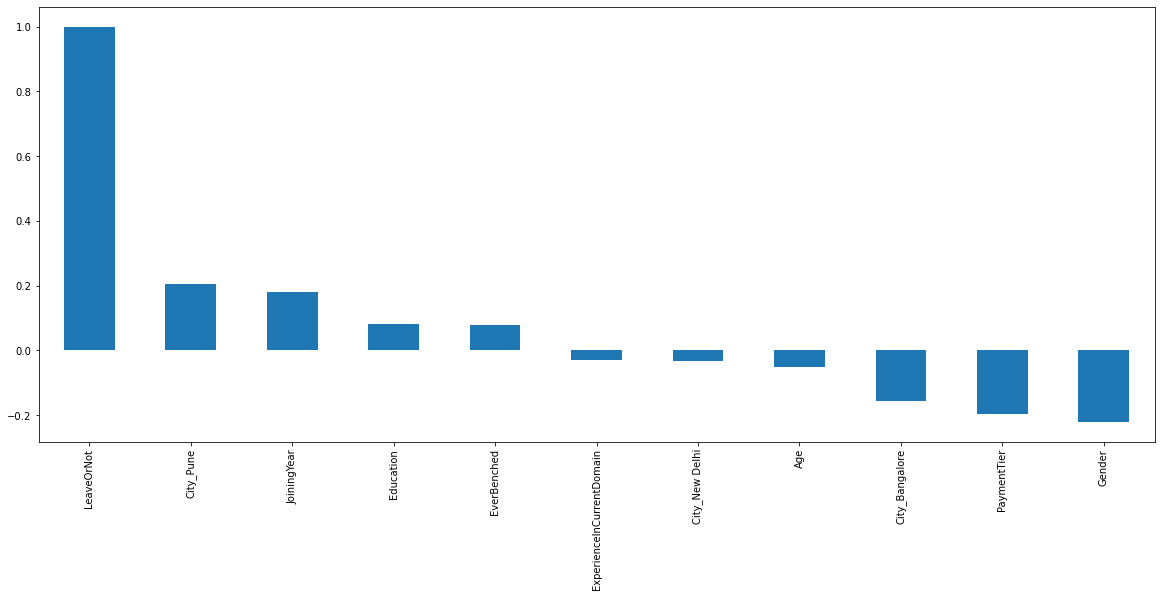

In [11]:
plt.figure(figsize=(20,8))
df1.corr()["LeaveOrNot"].sort_values( ascending=False).plot(kind='bar')

<AxesSubplot:title={'center':'Corealtion'}>

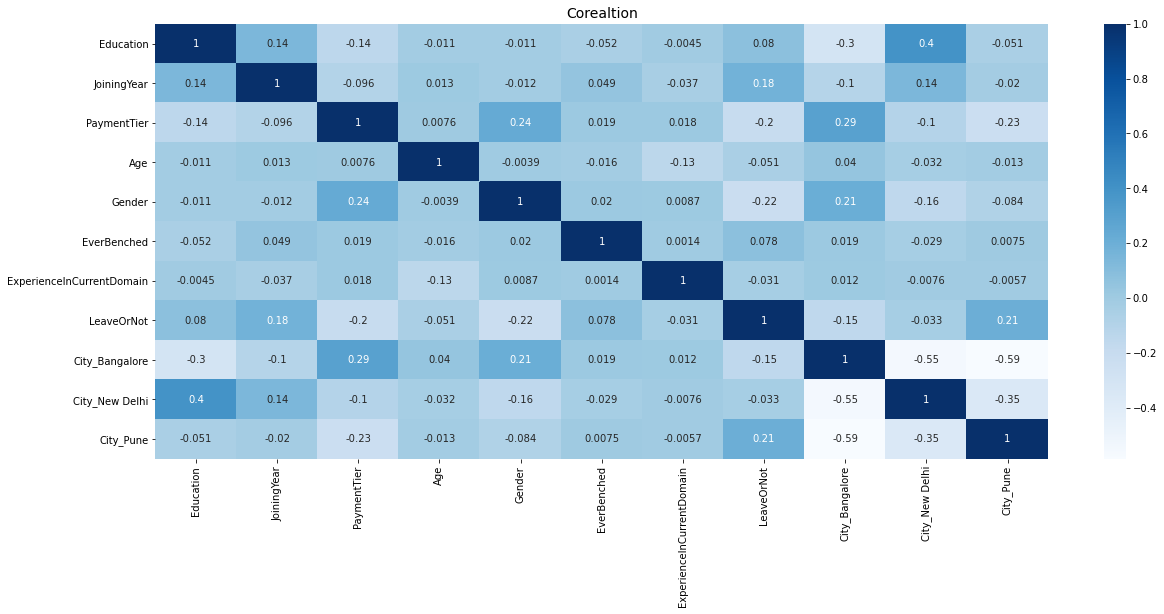

In [12]:
import seaborn as sns
plt.figure(figsize=(20,8))
plt.title("Corealtion", fontsize= 14)
sns.heatmap(df1.corr() ,annot= True,cmap="Blues")


# VIF

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dummy_df= df1.drop(['City_Bangalore', 'City_New Delhi', 'City_Pune'], axis=1)
vif=pd.DataFrame()
vif['Feature']= dummy_df.columns
vif["VIF"]=[variance_inflation_factor(dummy_df.values, i) for i in range(dummy_df.shape[1])]

In [14]:
vif

,Feature,VIF
0,Education,1.292912
1,JoiningYear,73.656983
2,PaymentTier,26.595280
3,Age,38.951295
4,Gender,2.724510
5,EverBenched,1.127648
6,ExperienceInCurrentDomain,4.567151
7,LeaveOrNot,1.667917


In [15]:

vif=pd.DataFrame()
vif["Feature"]=dummy_df.columns
vif["VIF"]=[variance_inflation_factor(dummy_df.values,i) for i in range (dummy_df.shape[1])]
vif

,Feature,VIF
0,Education,1.292912
1,JoiningYear,73.656983
2,PaymentTier,26.595280
3,Age,38.951295
4,Gender,2.724510
5,EverBenched,1.127648
6,ExperienceInCurrentDomain,4.567151
7,LeaveOrNot,1.667917


In [16]:
dummy_df .columns

Index(['Education', 'JoiningYear', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [17]:
dummy_df= df1.drop(['PaymentTier'], axis=1)
vif=pd.DataFrame()
vif['Feature']= dummy_df.columns
vif["VIF"]=[variance_inflation_factor(dummy_df.values, i) for i in range(dummy_df.shape[1])]

In [18]:
vif

,Feature,VIF
0,Education,1.230425
1,JoiningYear,1.070838
2,Age,1.024738
3,Gender,1.108220
4,EverBenched,1.013364
5,ExperienceInCurrentDomain,1.020913
6,LeaveOrNot,1.154593
7,City_Bangalore,599318.230659
8,City_New Delhi,311388.767050
9,City_Pune,341073.132979


In [19]:
df1.head()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,City_Bangalore,City_New Delhi,City_Pune
0,0,2017,3,34,1,0,0,0,1,0,0
1,0,2013,1,28,0,0,3,1,0,0,1
2,0,2014,3,38,0,0,2,0,0,1,0
3,1,2016,3,27,1,0,5,1,1,0,0
4,1,2017,3,24,1,1,2,1,0,0,1


In [20]:
df1.drop(['JoiningYear','PaymentTier'], axis=1 , inplace=True)


In [23]:
x = df1.iloc[:, :-1].values
y = df1.iloc[:, 7].values

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train_std=sc.fit_transform(x_train)
x_test_stds=sc.fit_transform(x_test)

In [28]:
from sklearn.tree import DecisionTreeClassifier
d_cls= DecisionTreeClassifier()
d_cls.fit(x_train_std,y_train)

DecisionTreeClassifier()

In [30]:
y_pred=d_cls.predict(x_test_stds)

In [31]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       871
           1       1.00      1.00      1.00       293

    accuracy                           1.00      1164
   macro avg       1.00      1.00      1.00      1164
weighted avg       1.00      1.00      1.00      1164



In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[871   0]
 [  0 293]]


In [39]:
from sklearn.model_selection import cross_val_score
val_score= cross_val_score(estimator=d_cls,X=x_train_std,y=y_train,cv=10)
print(val_score.mean())
print(val_score.std())

1.0
0.0


In [40]:
print(val_score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
